# 美国2012年总统候选人政治献金数据分析

导入包

In [39]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

方便大家操作，将月份和参选人以及所在政党进行定义

In [40]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

查看文件样式以及基本信息

In [41]:
election_data = pd.read_csv('../data/usa_election.txt', low_memory=False)
election_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [42]:
election_data['party'] = election_data['cand_nm'].map(parties)
election_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


查看单独一行，是否加上了'party'一列

In [43]:
election_data.party.head()

0    Republican
1    Republican
2    Republican
3    Republican
4    Republican
Name: party, dtype: object

使用np.unique()函数查看colums：party这一列中有哪些元素

In [44]:
election_data['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [45]:
election_data['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [46]:
election_data.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [47]:
election_data.groupby(by='party')[['contb_receipt_amt']].sum()

,contb_receipt_amt
party,
Democrat,8.105758e+07
Libertarian,4.132769e+05
Reform,3.390338e+05
Republican,1.192255e+08


查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [48]:
election_data['contb_receipt_dt'].unique().size

376

In [49]:
election_data.groupby(by=['party','contb_receipt_dt'])[['contb_receipt_amt']].sum().head()

contb_receipt_amt
party    contb_receipt_dt                   
Democrat 01-AUG-11                 175281.00
         01-DEC-11                 651532.82
         01-JAN-12                  58098.80
         01-JUL-11                 165961.00
         01-JUN-11                 145459.00

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [50]:
election_data.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

查看是否转换成功

将时间转换为时间数据类型  
根据时间进行排序

In [51]:
def convert(x):
    day,m,year = x.split('-')
    month = months[m]
    return '20'+year+'-' + str(month) +'-'+day

In [52]:
election_data['contb_receipt_dt'] = election_data['contb_receipt_dt'].map(convert)

In [53]:
election_data['contb_receipt_dt'] = pd.to_datetime(election_data['contb_receipt_dt'])

In [54]:
election_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-06-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,2011-08-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican


得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [61]:
ele = election_data.groupby(by=['party','contb_receipt_dt'])[['contb_receipt_amt']].sum()
ele

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   2011-04-04                640235.12
           2011-04-05                307641.00
           2011-04-06                247542.59
           2011-04-07                252336.00
           2011-04-08                295452.00
           2011-04-09                105879.00
           2011-04-10                100373.00
           2011-04-11                360728.00
           2011-04-12                405160.46
           2011-04-13                382836.33
           2011-04-14                306643.50
           2011-04-15                408377.00
           2011-04-16                 82658.00
           2011-04-17                 70802.00
           2011-04-18                501971.37
           2011-04-19                304874.00
           2011-04-20                314540.11
           2011-04-21                315618.00
           2011-04-22                295464.45
           2011-04-23                 34829.00
           2011-04-24                 37100.00
           2011-04-25                447282.00
           2011-04-26                600960.50
           2011-04-27                188595.00
           2011-04-28                677041.36
           2011-04-29                294709.00
           2011-04-30                 95582.00
           2011-05-01                 82644.00
           2011-05-02                396675.00
           2011-05-03                261819.11
...                                        ...
Republican 2012-01-02                114037.13
           2012-01-03                155803.62
           2012-01-04                577733.61
           2012-01-05                451065.98
           2012-01-06                262798.46
           2012-01-07                148145.58
           2012-01-08                 84342.84
           2012-01-09                501931.44
           2012-01-10                487901.67
           2012-01-11                452916.99
           2012-01-12                348327.39
           2012-01-13                463368.26
           2012-01-14                608470.68
           2012-01-15                322194.08
           2012-01-16                367791.70
           2012-01-17                625365.77
           2012-01-18                888681.17
           2012-01-19               1066250.23
           2012-01-20                401298.03
           2012-01-21                374261.81
           2012-01-22                507168.71
           2012-01-23                645477.15
           2012-01-24                462233.66
           2012-01-25                416931.39
           2012-01-26                256406.86
           2012-01-27                368441.82
           2012-01-28                 82775.80
           2012-01-29                 75220.02
           2012-01-30                255204.80
           2012-01-31                869890.41

[1183 rows x 1 columns]

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [17]:
ele.unstack()

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       NaN        NaN        NaN        NaN   
Libertarian                    NaN        NaN        NaN        NaN   
Reform                         NaN        NaN        NaN        NaN   
Republican                  8600.0     4800.0     5000.0     4150.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                NaN        NaN        NaN        NaN        NaN   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                  NaN        NaN        NaN        NaN        NaN   
Republican           4000.0     6000.0      500.0      750.0      500.0   

                                ...                                       \
contb_receipt_dt 2011-01-18     ...     2012-01-22 2012-01-23 2012-01-24   
party                           ...                                        
Democrat                NaN     ...       67194.23  337307.07  458909.23   
Libertarian             NaN     ...            NaN        NaN        NaN   
Reform                  NaN     ...         450.00     225.00     500.00   
Republican           4800.0     ...      507168.71  645477.15  462233.66   

                                                                         \
contb_receipt_dt 2012-01-25 2012-01-26 2012-01-27 2012-01-28 2012-01-29   
party                                                                     
Democrat          438949.32  450268.94  305785.47  235492.85   93177.00   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform               282.00      25.00    3176.37     175.00     200.00   
Republican        416931.39  256406.86  368441.82   82775.80   75220.02   

                                         
contb_receipt_dt 2012-01-30  2012-01-31  
party                                    
Democrat          435921.72  1418410.31  
Libertarian             NaN         NaN  
Reform               130.00      150.00  
Republican        255204.80   869890.41  

[4 rows x 376 columns]

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数
使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [56]:
ele2 = ele.unstack(level=0, fill_value=0)
ele2.head()

contb_receipt_amt                              
party                     Democrat Libertarian Reform Republican
contb_receipt_dt                                                
2011-01-01                     0.0         0.0    0.0     8600.0
2011-01-03                     0.0         0.0    0.0     4800.0
2011-01-04                     0.0         0.0    0.0     5000.0
2011-01-12                     0.0         0.0    0.0     4150.0
2011-01-13                     0.0         0.0    0.0     4000.0

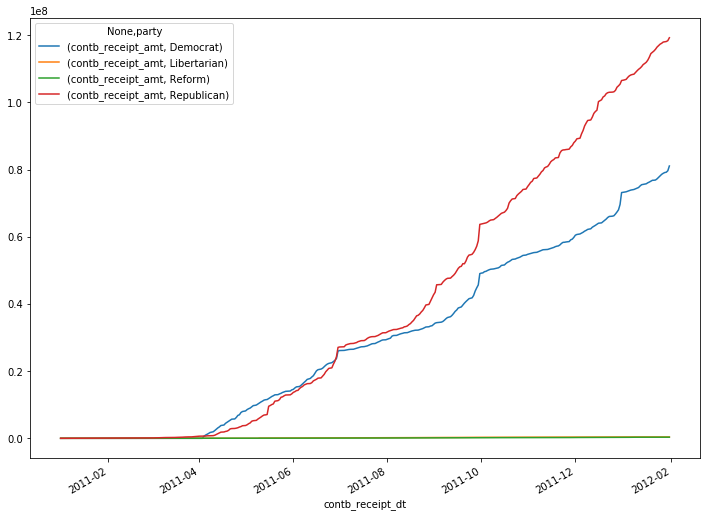

In [22]:
plot = ele2.cumsum().plot()
fig = plot.get_figure()
fig.set_size_inches(12,9)

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [23]:
ele.unstack(level=-1)

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       NaN        NaN        NaN        NaN   
Libertarian                    NaN        NaN        NaN        NaN   
Reform                         NaN        NaN        NaN        NaN   
Republican                  8600.0     4800.0     5000.0     4150.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                NaN        NaN        NaN        NaN        NaN   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                  NaN        NaN        NaN        NaN        NaN   
Republican           4000.0     6000.0      500.0      750.0      500.0   

                                ...                                       \
contb_receipt_dt 2011-01-18     ...     2012-01-22 2012-01-23 2012-01-24   
party                           ...                                        
Democrat                NaN     ...       67194.23  337307.07  458909.23   
Libertarian             NaN     ...            NaN        NaN        NaN   
Reform                  NaN     ...         450.00     225.00     500.00   
Republican           4800.0     ...      507168.71  645477.15  462233.66   

                                                                         \
contb_receipt_dt 2012-01-25 2012-01-26 2012-01-27 2012-01-28 2012-01-29   
party                                                                     
Democrat          438949.32  450268.94  305785.47  235492.85   93177.00   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform               282.00      25.00    3176.37     175.00     200.00   
Republican        416931.39  256406.86  368441.82   82775.80   75220.02   

                                         
contb_receipt_dt 2012-01-30  2012-01-31  
party                                    
Democrat          435921.72  1418410.31  
Libertarian             NaN         NaN  
Reform               130.00      150.00  
Republican        255204.80   869890.41  

[4 rows x 376 columns]

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [93]:
ele3 = election_data.groupby(['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum()
ele3

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [94]:
election_data['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

把索引变成列,Series.reset_index()

In [69]:
ele3.reset_index()

,cand_nm,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle",100% DISABLED VETERAN,1869.50
1,"Bachmann, Michelle",100% DISABLED VIETNAM VETERAN,236.25
2,"Bachmann, Michelle",A/C AND HEAT,250.00
3,"Bachmann, Michelle",ACADEMIC EMPLOYMENT SPECIALIST,25.00
4,"Bachmann, Michelle",ACCOUNT,50.00


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [70]:
election_data.groupby(['cand_nm'])[['contb_receipt_amt']].max()

,contb_receipt_amt
cand_nm,
"Bachmann, Michelle",3022.00
"Cain, Herman",10000.00
"Gingrich, Newt",5100.00
"Huntsman, Jon",5000.00
"Johnson, Gary Earl",2500.00
"McCotter, Thaddeus G",4000.00
"Obama, Barack",1944042.43
"Paul, Ron",5000.00
"Pawlenty, Timothy",10000.00


In [71]:
election_data.query("cand_nm =='Obama, Barack' and contb_receipt_amt == 1944042.43")

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,NaN,X,*,SA18,763233,Democrat
